<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Four
##Anna-Maria Berezovski
##CSC 687
##February 23, 2022



## Import and prepare the Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# We have two files to work with, a test file and a train file. We will import them
# both here into two data frames
df_test = pd.read_csv('Test.csv')
df_train = pd.read_csv('Train.csv')

In [2]:
# Now we want to set out X and y as the Data and the target variable respectively
# Training data
X = df_train.drop(columns=['Segmentation', 'ID', 'Var_1'])
y = df_train.loc[:,'Segmentation']

# Testing data
X_test = df_test.drop(columns=['Segmentation', 'ID', 'Var_1'])
y_test = df_test.loc[:,'Segmentation']

## Finding Relationships with the data


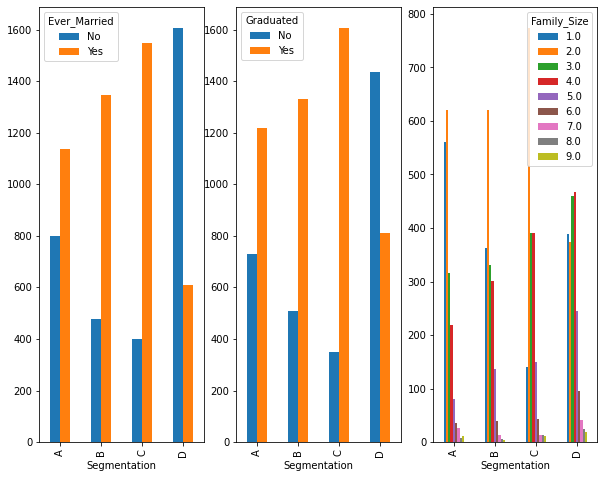

In [3]:
# Since we are working with a categorical target variable, we cannot use a correlation 
# matrix. Instead, we will graph the relationship between the target variable and the 
# other variables to see if there is some pattern or relationship between them
figure, axes = plt.subplots(1, 3)

ct1 = pd.crosstab(df_train['Segmentation'], df_train['Ever_Married'])
ct1.plot.bar(ax = axes[0],figsize=(10,8))

ct2 = pd.crosstab(df_train['Segmentation'], df_train['Graduated'])
ct2.plot.bar(ax = axes[1],figsize=(10,8))

ct3 = pd.crosstab(df_train['Segmentation'], df_train['Family_Size'])
ct3.plot.bar(ax = axes[2],figsize=(10,8))

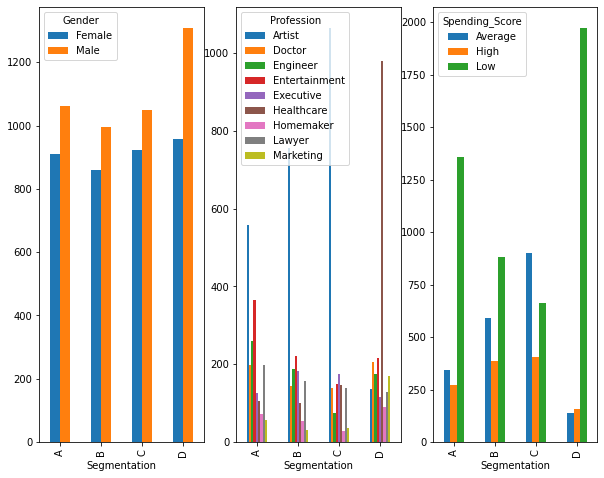

In [4]:
figure, axes = plt.subplots(1, 3)

ct1 = pd.crosstab(df_train['Segmentation'], df_train['Gender'])
ct1.plot.bar(ax = axes[0],figsize=(10,8))

ct2 = pd.crosstab(df_train['Segmentation'], df_train['Profession'])
ct2.plot.bar(ax = axes[1],figsize=(10,8))

ct3 = pd.crosstab(df_train['Segmentation'], df_train['Spending_Score'])
ct3.plot.bar(ax = axes[2],figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed051203d0>,
      dtype=object)

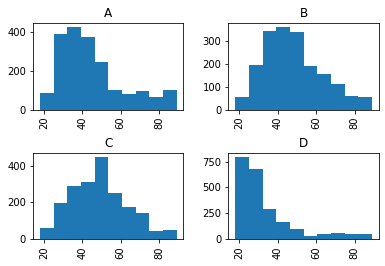

In [5]:
# Age
df_train.hist(by='Segmentation', column='Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed04eeea10>,
      dtype=object)

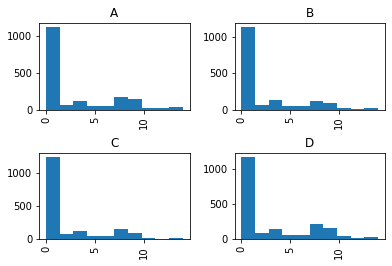

In [6]:
# Work Experience
df_train.hist(by='Segmentation', column='Work_Experience')

After looking at the graphs of the relationships between the target variable and other variables, it seems that Ever_Married, Graduated, Profession, and Age seems to have an impact on the grouping of the data into the segmentations (the target variable)

## Creating Pipelines

In [7]:
X.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [8]:
X.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
dtype: object

In [9]:
# First, we will make two different pipelines; one for categorical and one for numeric
# variables. 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

########## First create a pipeline for the categoric attributes

cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

cat_transformer = Pipeline(steps=[
    # strategies are mean, median, most_frequent, etc.
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # In ordinal encoding, each unique category value is assigned an integer value.
    ('ordinal', OrdinalEncoder())
])

########## Second create a pipeline for the numeric attributes

num_cols = ['Age', 'Work_Experience', 'Family_Size']

num_transformer = Pipeline(steps=[
    # Number of neighboring samples to use for K-nearest neighor imputation
    ('imputer', KNNImputer(n_neighbors=5)),

    # StandardScaler makes mean = 0 and scales the data to unit variance 
    ('scaler', StandardScaler())
])

########## Finally, apply column transformations

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

## Classification Pipelines

### SVC

SVC Linear Kernel

In [10]:
num_folds = 10

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

########## A linear kernel classifier
lin_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear' ,random_state=42))])

lin_svc_clf_train_score = cross_val_score(lin_svc_clf,  X, y, cv=num_folds, scoring="accuracy").mean()
lin_svc_clf_test_score = cross_val_score(lin_svc_clf,  X_test, y_test, cv=num_folds, scoring="accuracy").mean()

SVC Poly Kernel

In [12]:
########## A poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly' ,random_state=42))])

poly_svc_clf_train_score = cross_val_score(poly_svc_clf,  X, y, cv=num_folds, scoring="accuracy").mean()
poly_svc_clf_test_score = cross_val_score(poly_svc_clf,  X_test, y_test, cv=num_folds, scoring="accuracy").mean()

SVC RBF Kernel

In [13]:
########## A RBF kernel classifier
RBF_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf' ,random_state=42))])

RBF_svc_clf_train_score = cross_val_score(RBF_svc_clf,  X, y, cv=num_folds, scoring="accuracy").mean()
RBF_svc_clf_test_score = cross_val_score(RBF_svc_clf,  X_test, y_test, cv=num_folds, scoring="accuracy").mean()

### Decision Tree 

Gini Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

########## A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_train_score = cross_val_score(gini_dt_clf, X, y, cv=num_folds, scoring="accuracy").mean()
gini_dt_test_score = cross_val_score(gini_dt_clf, X_test, y_test, cv=num_folds, scoring="accuracy").mean()

Entropy Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

########## A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entropy_dt_train_score = cross_val_score(entropy_dt_clf, X, y, cv=num_folds, scoring="accuracy").mean()
entropy_dt_test_score = cross_val_score(entropy_dt_clf, X_test, y_test, cv=num_folds, scoring="accuracy").mean()

## Summary of Pipeline Model Findings

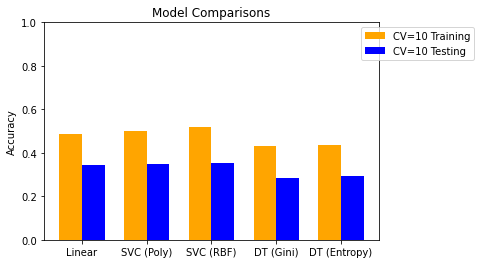

In [16]:
# Summarize the findings for all models

labels = ['Linear', 'SVC (Poly)', 'SVC (RBF)', 'DT (Gini)', 'DT (Entropy)']
training_scores = [lin_svc_clf_train_score, poly_svc_clf_train_score, RBF_svc_clf_train_score, gini_dt_train_score, entropy_dt_train_score]
testing_scores = [lin_svc_clf_test_score, poly_svc_clf_test_score, RBF_svc_clf_test_score, gini_dt_test_score, entropy_dt_test_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

figure, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='CV=10 Training', color='orange')
rects2 = ax.bar(x + width/2, testing_scores, width, label='CV=10 Testing', color='blue')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

## Entropy Decision Tree classification knowledge



|--- Gender <= -0.57
|   |--- Gender <= -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 12
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 14
|   |--- Gender >  -1.16
|   |   |--- Spending_Score <= 4.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- Spending_Score >  4.50
|   |   |   |--- truncated branch of depth 22
|--- Gender >  -0.57
|   |--- Family_Size <= 1.50
|   |   |--- Work_Experience <= 0.50
|   |   |   |--- truncated branch of depth 22
|   |   |--- Work_Experience >  0.50
|   |   |   |--- truncated branch of depth 26
|   |--- Family_Size >  1.50
|   |   |--- Spending_Score <= 1.50
|   |   |   |--- truncated branch of depth 20
|   |   |--- Spending_Score >  1.50
|   |   |   |--- truncated branch of depth 22



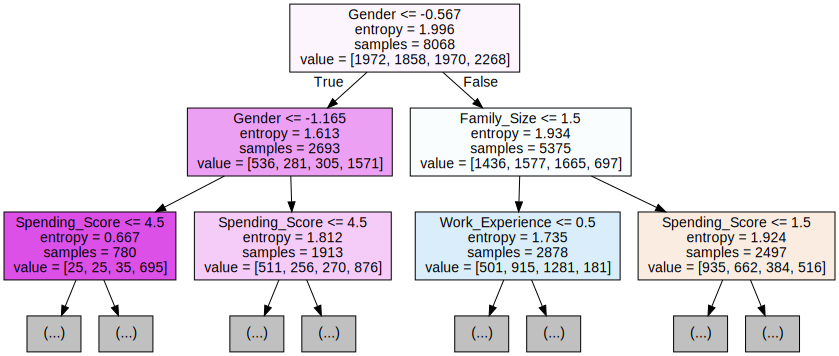

In [17]:
# Convert the decision tree model to text and graph

from matplotlib import pyplot
from sklearn.tree import export_text, export_graphviz
import graphviz

# we need to refit the DT model that is part of a composite pipe before exporting it as text
entropy_dt_clf['classifier'].fit(preprocessor.fit_transform(X), y)


# display the induced decision tree as a series of logical rules
text_representation = export_text(entropy_dt_clf['classifier'],
                                  feature_names=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size'],
                                  max_depth=2)
print(text_representation)


# draw the induced decision tree
dot_data = export_graphviz(entropy_dt_clf['classifier'],
                                  max_depth=2,
                                  feature_names=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size'],
                                  filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

Feature: 0, Score: 0.39321
Feature: 1, Score: 0.19397
Feature: 2, Score: 0.11883
Feature: 3, Score: 0.04998
Feature: 4, Score: 0.01924
Feature: 5, Score: 0.04236
Feature: 6, Score: 0.11837
Feature: 7, Score: 0.06404


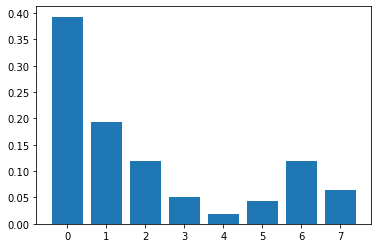

In [18]:
# get feature importances from the model
importance = entropy_dt_clf['classifier'].feature_importances_

# summarize feature importances
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importances
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

* Feature 0: Gender
* Feature 1: Ever_Married
* Feature 2: Age
* Feature 3: Graduated
* Feature 4: Profession
* Feature 5: Work_Experience
* Feature 6: Spending_Score
* Feature 7: Family_Size

## Hyperparameter Values

In [19]:
from sklearn.model_selection import GridSearchCV
# Use GridSearchCV to find optimum hyperparameter values for the DT model

# create a dictionary of all values we want to test
param_grid1 = { 'criterion':['gini','entropy'],    # impurity criterion
              'max_depth': np.arange(3, 15)}      # tree depth 
   
    
# use gridsearch to test all values
grid_search1 = GridSearchCV(entropy_dt_clf['classifier'], 
                           param_grid1, 
                           cv=3)
    
# fit the model 
grid_search1.fit(preprocessor.fit_transform(X), y)

   
print("The best achieved accuracy after hyperparameter optimization: %.2f \n" % (grid_search1.best_score_))

print("The best DT model hyperparameters:", grid_search1.best_params_)

The best achieved accuracy after hyperparameter optimization: 0.52 

The best DT model hyperparameters: {'criterion': 'gini', 'max_depth': 5}


In [24]:
# Use GridSearchCV to find optimum hyperparameter values for the SVC poly model


# create a dictionary of all values we want to test
param_grid2 = {'kernel':['poly'], 
              'gamma':['scale','auto'],      # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              'degree': np.arange(3,5),      # polynomial degree
              'C': np.arange(1,5)}          # Regularization parameter
   
    
# use gridsearch to test all values
grid_search2 = GridSearchCV(poly_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# fit the model 
grid_search2.fit(preprocessor.fit_transform(X), y)

   
print("The best achieved accuracy after hyperparameter optimization: %.2f\n" % grid_search2.best_score_)

print("The best SVC poly model hyperparameters:", grid_search2.best_params_)

The best achieved accuracy after hyperparameter optimization: 0.52

The best SVC poly model hyperparameters: {'C': 4, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


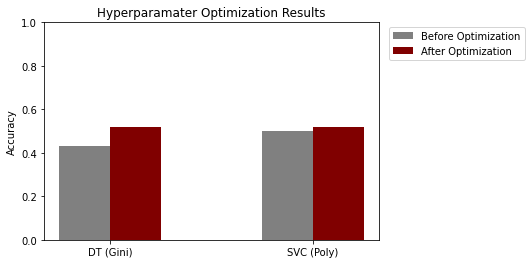

In [21]:
# graph results of grid search for the two models

labels = ['DT (Gini)', 'SVC (Poly)']
before_optimization_scores = [gini_dt_train_score, poly_svc_clf_train_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

x = np.arange(len(labels))  # the label locations
width = 0.25                # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_optimization_scores, width, label='Before Optimization', color='gray')
rects2 = ax.bar(x + width/2, after_optimization_scores, width, label='After Optimization', color='maroon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Hyperparamater Optimization Results')
plt.show()

## Summary

In this assignment, we first took the given test and training data and looked at the relationship between the target variable and other variables. Then, We created pipelines and used these pipelines to run classification models to see which could best and most accuratly put given people into the correct target variable groups. As expected, all of the models did a better job predicting with the training data with accuracies reaching around 40 - 50%. The overall best model was the SVC with RBF kernel. This model had almost 60% accuracy with training data and almost 40% with the test data. Both decision trees (Gini and Entropy) performed the worst and at about the same level. After this, we optomized hyperparameters for the Gini decision tree and the poly SVC. We see that with optimization, the decision tree was able to do as well as the SVC. And in both models, we saw improvement from the pre and post optimization results. 